# Forecasting - Time Series

#### Build a forecast model for solar power consumption of daily data since 2011 to 2018.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
spc_df = pd.read_csv(r"D:\360digi\DS\Sharath\Forecasting_3_Smoothing\handson\Datasets_Forecasting-3\solarpower_cumuldaybyday2.csv")
spc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2558 non-null   object 
 1   cum_power  2558 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.1+ KB


In [4]:
spc_df.tail()

,date,cum_power
2553,22/10/2018,28101.0
2554,23/10/2018,28109.0
2555,24/10/2018,28115.0
2556,25/10/2018,28117.0
2557,26/10/2018,28120.0


In [5]:
# 2012 and 2016 are leap years

<AxesSubplot:>

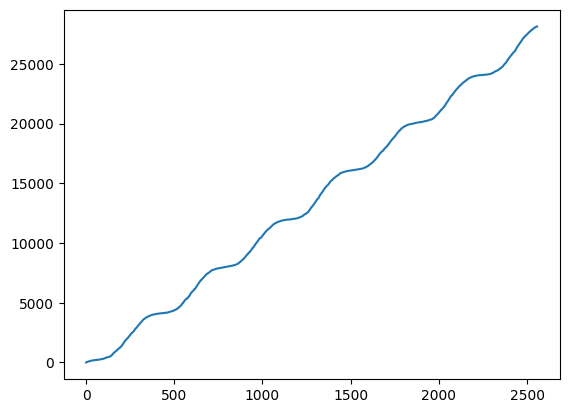

In [6]:
# Visualization - Time plot
spc_df.cum_power.plot()

In [ ]:
# Trend - upward

In [7]:
# Data Partition
Train = spc_df.head(2193)
Test = spc_df.tail(365)

In [8]:
Test

,date,cum_power
2193,27/10/2017,23920.0
2194,28/10/2017,23928.0
2195,29/10/2017,23931.0
2196,30/10/2017,23937.0
2197,31/10/2017,23943.0
...,...,...
2553,22/10/2018,28101.0
2554,23/10/2018,28109.0
2555,24/10/2018,28115.0
2556,25/10/2018,28117.0


In [9]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, actual):
    temp = np.abs((pred - actual)/actual)*100
    return np.mean(temp)

In [10]:
# Moving Average for the time series
mv_pred = spc_df["cum_power"].rolling(365).mean()
mv_pred.tail(365)

2193    21510.432877
2194    21521.449315
2195    21532.468493
2196    21543.484932
2197    21554.501370
            ...     
2553    25457.767123
2554    25469.273973
2555    25480.783562
2556    25492.295890
2557    25503.810959
Name: cum_power, Length: 365, dtype: float64

In [11]:
MAPE(mv_pred.tail(365), Test.cum_power)

7.8249171689821235

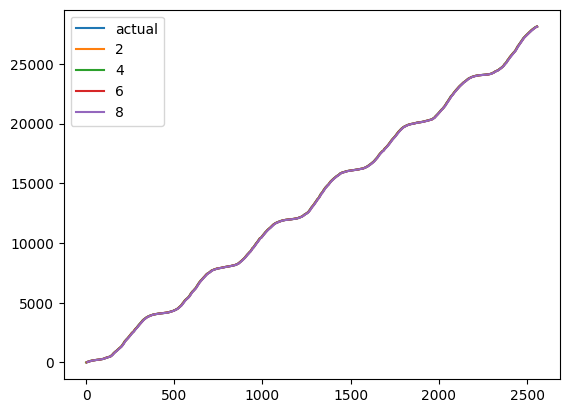

In [12]:
# Plot with Moving Averages
spc_df.cum_power.plot(label = "actual")
for i in range(2, 9, 2):
    spc_df["cum_power"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 2)

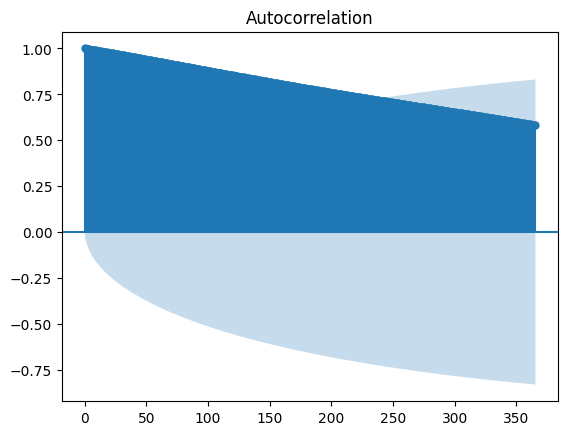

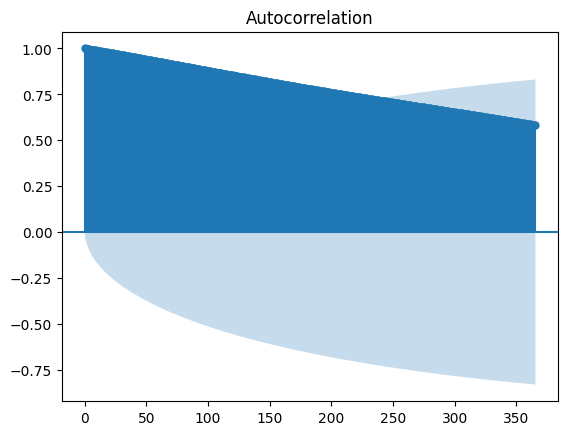

In [13]:
tsa_plots.plot_acf(spc_df.cum_power, lags = 365)

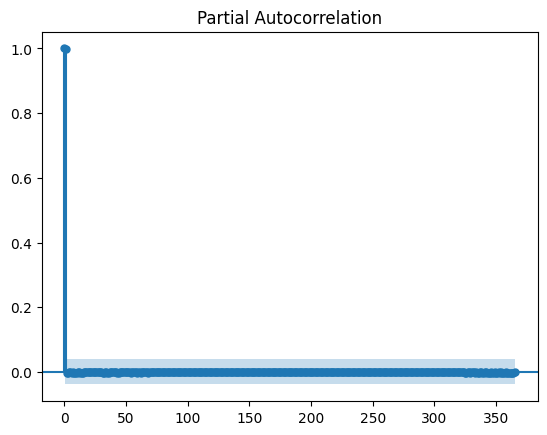

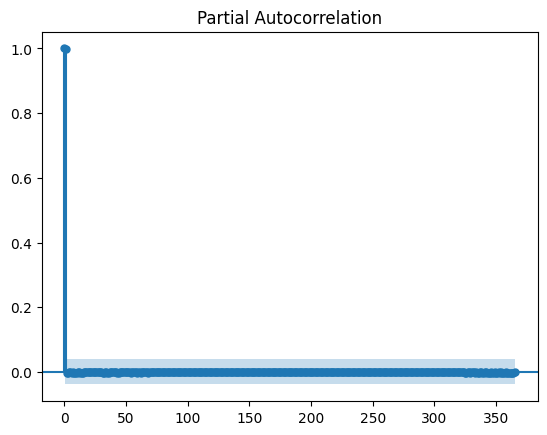

In [14]:
tsa_plots.plot_pacf(spc_df.cum_power, lags = 365)

# Forecasting models

In [15]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["cum_power"]).fit()

In [16]:
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
ses = MAPE(pred_ses, Test.cum_power) 

In [17]:
# Holt method 
hw_model = Holt(Train["cum_power"]).fit()

In [18]:
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
hw = MAPE(pred_hw, Test.cum_power) 

In [19]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["cum_power"], seasonal = "add", trend = "add", seasonal_periods = 365).fit()

In [20]:
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
hwe = MAPE(pred_hwe_add_add, Test.cum_power) 

In [21]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["cum_power"], seasonal = "mul", trend = "add", seasonal_periods = 365).fit()

In [22]:
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
hwe_w = MAPE(pred_hwe_mul_add, Test.cum_power) 

In [23]:
# comparing all mape's
di = pd.Series({'Simple Exponential Method':ses, 'Holt method ':hw, 'hw_additive seasonality and additive trend':hwe, 'hw_multiplicative seasonality and additive trend':hwe_w})
mape = pd.DataFrame(di, columns=['mape'])
mape

,mape
Simple Exponential Method,5.931361
Holt method,3.305316
hw_additive seasonality and additive trend,3.571282
hw_multiplicative seasonality and additive trend,56.985115


In [24]:
# Final Model on 100% Data
model = Holt(spc_df["cum_power"]).fit()

In [25]:
newdata_pred = model.predict(start = spc_df.index[0], end = len(spc_df) + 12 -1 )
newdata_pred

0           0.127585
1           7.544533
2          18.207340
3          28.629669
4          38.235324
            ...     
2565    28164.105383
2566    28169.618556
2567    28175.131729
2568    28180.644902
2569    28186.158075
Length: 2570, dtype: float64

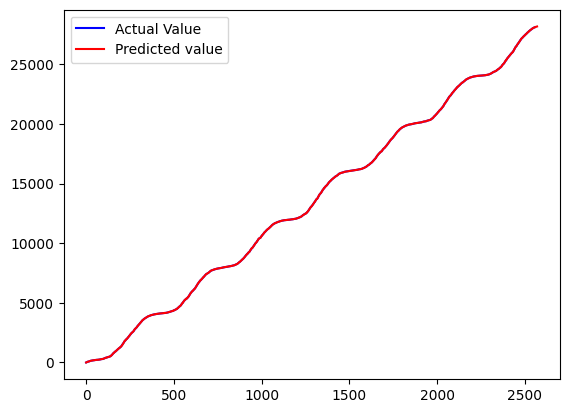

In [26]:
fig, ax = plt.subplots()
ax.plot(spc_df.cum_power, '-b', label = 'Actual Value')
ax.plot(newdata_pred, '-r', label = 'Predicted value')
ax.legend();
plt.show()